### Mandelbrot Set

##### The Mandelbrot Set is a set of complex numbers where  ${z}_{n+1} = {z}_{n} ^2 + c$  does not converge when iterated from $z = 0$. Images of this set exhibit infinite and complicated boundary regions due to its recrsive nature.

##### This Python script plots a Mandelbrot Set for a given Matrix size, up to a given number of iterations. Play with the colormap for different outputs!

In [2]:
#imports
import matplotlib.pyplot as plt
import numpy as np

def create_variables(n = 400, x_range = [-2.5,1.5], y_range = [-1.5,1.5]):
    # input: n is the matrix size given as a square matrix of n X n
    #        x_range and y_range are the given ranges chosen for the matrix
    # Default variables chosen as an example
    
    x = np.linspace(x_range[0],x_range[1],n)  # x axis used for the Real part of C matrix in the range
    y = np.linspace(y_range[0],y_range[1],n)  # y axis used for the Imaginary part of the C matrix in the range

    # create the C values matrix
    real, imaginary = np.meshgrid(x,y) # assigning the arrays for the matrix values using the numpy meshgrid function
    c_matrix = real + 1j * imaginary # each value of the C matrix is a complex number with real and imaginary parts

    # create the counter matrix to check whether the mandelbrot set condition is met
    # the final result of this matrix is the last count calculated before the condition is not met
    z_count = np.zeros((n,n))

    # create the iterations matrix for the calculation of z_i
    z_iter = np.zeros((n,n))
    
    # return the matrices for further calculations 
    return [c_matrix,z_count,z_iter]

In [7]:
# Recursive function for mandelbrot set
def mandelbrot(iterations = 25):
    # input: iterations - number of iterations of the recursive function
    # Default variables chosen as an example
    
    c_matrix, z_count, z_iter = create_variables()
    
    for i in range(iterations):
        z_iter = z_iter ** 2 + c_matrix  # Recursive function for the Mandelbrot Set
    
        z_count = z_count + (np.absolute(z_iter) <= 2)   # mandelbrot set condition
        # if abs(z) <= 2 return True and add 1 to counter matrix (in Mandelbrot Set)
        # else return False and add 0 to counter matrix (not in Mandelbrot Set)
        
        # ADD this condition to ignore running time overflow errors - for the example chosen f
        z_iter = np.where(np.abs(z_iter) > 1000, 1000, z_iter)  # condition in order to ignore running time overflow errors
    
    return z_count

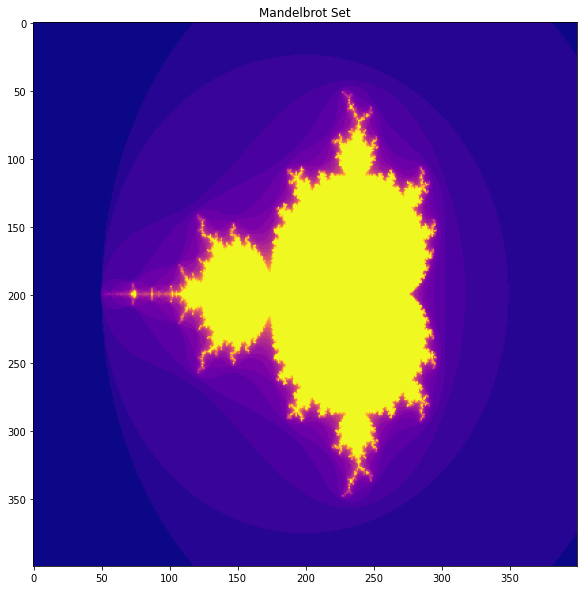

In [18]:
# Plot the Counter Matrix to visualize the Mandelbrot Set!

count_matrix = mandelbrot()
size = 10

plt.figure(figsize = (size,size))
plt.imshow(count_matrix, cmap = 'plasma') # plot with a different colormaps! 
plt.title('Mandelbrot Set')
plt.show()
